## An attempt at forecasting my credit card spends using data from the last 2 years

__Author__ Syamanthaka Balakrishnan
__Created__ 24th March 2020

#### Steps
* Read in the data and aggregate on a monthly basis. For now, we ignore the description of the spend.
* Plot a basic graph to see a visual trend
* Test data for stationarity and seasonality
* Split data into train and test, run a model.
* Train entire data set and predict on next 6 months

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_excel("sbicard.xlsx", sheet_name="Sheet1")
df.head()

,Date,Description,Amount Spent (Rs.)
0,2018-02-24,FRESHCO HYPER MARKET BANGALORE IN,1412.0
1,2018-02-24,THANCO NATURAL ICE CRE BANGALORE IN,348.0
2,2018-02-24,DAILY FRESH FRUITS AND BANGALORE IN,819.0
3,2018-03-01,KEYS HOTEL MUMBAI IN,5711.2
4,2018-03-02,FRESHCO HYPERMARKET BANGALORE IN,1216.0


In [6]:
## Group by each day of spend that is on record
daily_spends = df.groupby('Date').sum()

In [4]:
## Using the pandas Grouper - gives monthly spend
monthly_spends = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()

In [27]:
monthly_spends.head()

,Amount Spent (Rs.)
Date,
2018-02-28,2579.00
2018-03-31,78993.50
2018-04-30,57520.03
2018-05-31,126830.20
2018-06-30,115362.39


In [5]:
## More readable string format - strftime for converting date time
## %b - for month in 3 letter code %y for 2 digit year
agg_df = monthly_spends
agg_df.index = agg_df.index.strftime('%b%y')
agg_df.head()

,Amount Spent (Rs.)
Feb18,2579.00
Mar18,78993.50
Apr18,57520.03
May18,126830.20
Jun18,115362.39


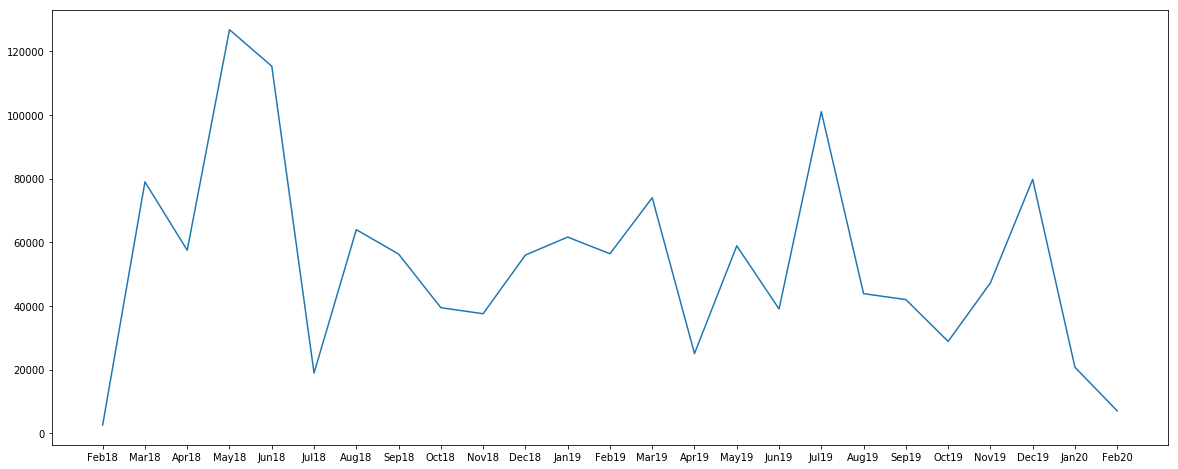

In [32]:
## Basic pyplot to see the trend visually
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.plot(agg_df)

* May 2018 we made a lot of flight bookings and hotel bookings for a vacation post an extended business trip.  
* Next peak seen is that in Jun 2019, where there was another travel for which the credit card was swiped. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289CCF1BE80>]],
      dtype=object)

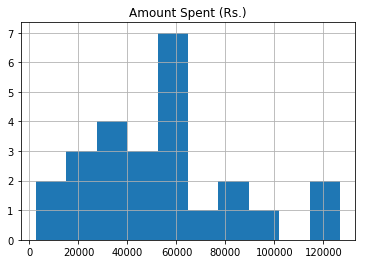

In [6]:
## Lets see if the data is normally distributed
agg_df.hist()

In [21]:
X = agg_df['Amount Spent (Rs.)']
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=59596.210000, mean2=48001.914615
variance1=1259561611.486800, variance2=678547085.476443


The means seem to be in a similar ball park, when the data is split into two groups. But the variances are not only not close, but also ridiculously high. 
Now this means the following:
1. The data is non- stationary or that there is some trend or seasonality that is observed. (Will test this a bit more later)
2. A good possibility is that the model may do well, because it gives a lot of attention to the data and won't generalize unknown data. (This is also to be seen later)

Now the __Augmented DickyFuller Test__ : Let's begin with the null hypothesis that the data is __NOT__ stationary - ie. there is some time dependent trend. 
* If the statistic value of the adftest comes out to be a negative value, null hypothesis holds good. Else, reject null hypothesis, meaning it is stationary data.
* Also p-value > 0.05 accepts null hypothesis and p-value <= 0.05 rejects null hypothesis

In [25]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if (result[0] > 0) & (result[1] > 0.05):
    print("Rejecting null hypothesis, Stationary data confirmed")
else:
    print("Accepting null hypothesis, Non-Stationary data")

ADF Statistic: 2.562621
p-value: 0.999067
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674
Rejecting null hypothesis, Stationary data confirmed
